In [58]:
import os 
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from collections import OrderedDict

In [44]:
%matplotlib inline


In [61]:
dependencies = json.load(open("D:\\Updated Repository\\New folder\\package-lock.json"), object_pairs_hook=OrderedDict)['dependencies']

In [62]:
print (dependencies)

OrderedDict([(u'@bentley/imodeljs-backend', OrderedDict([(u'version', u'0.97.2'), (u'resolved', u'https://npm.bentley.com/npm/npm/@bentley/imodeljs-backend/-/imodeljs-backend-0.97.2.tgz'), (u'integrity', u'sha1-F7LcGJlTBOwNDW+0/AsXz1uGXNs='), (u'requires', OrderedDict([(u'@bentley/imodeljs-native-platform-api', u'~22.0.0'), (u'fs-extra', u'^6.0.1'), (u'glob', u'^7.1.2'), (u'js-base64', u'^2.4.5'), (u'semver', u'^5.5.0')]))])), (u'@bentley/imodeljs-native-platform-api', OrderedDict([(u'version', u'22.0.0'), (u'resolved', u'https://npm.bentley.com/npm/npm/@bentley/imodeljs-native-platform-api/-/imodeljs-native-platform-api-22.0.0.tgz'), (u'integrity', u'sha1-pOtumRqZiiAlYLWtK/lL/lx0b2o=')])), (u'balanced-match', OrderedDict([(u'version', u'1.0.0'), (u'resolved', u'https://registry.npmjs.org/balanced-match/-/balanced-match-1.0.0.tgz'), (u'integrity', u'sha1-ibTRmasr7kneFk6gK4nORi1xt2c=')])), (u'brace-expansion', OrderedDict([(u'version', u'1.1.11'), (u'resolved', u'https://registry.npmjs.

In [63]:
packageName = list(dependencies.keys())[0]
fileName = 'dependency_graph_'+packageLockFile['name']+'.png'
nodeName = packageName+'@'+dependencies[packageName]['version']

In [64]:
print nodeName


@bentley/imodeljs-backend@0.97.2


In [65]:
def makeGraph(queue, graph):
    if (len(queue)) == 0:
        return
    n = queue.popleft()
    node = n+'@'+dependencies[n]['version']
    graph.add_node(node)

    if dependencies[n].get('requires'):
        
        for i in dependencies[n]["requires"]:
#             graph.add_edges_from([(node,i+'@'+dependencies[n]["requires"][i])])
            graph.add_edges_from([(node,i+'@'+dependencies[i]["version"])],attr_dict={'length':100,'weight':50})
            queue.append(i)
    makeGraph(queue, graph)

In [66]:
G = nx.DiGraph()
q = deque([list(dependencies.keys())[0]])
makeGraph(q, G)



In [67]:


# plt.figure(num=None, figsize=(10, 10), dpi=150, facecolor='w', edgecolor='k')
# pos = nx.draw_circular(G, with_labels=True, arrowstyle = '->', arrowsize = 7, node_size = 500,
#                node_color=np.arange(0, len(G.nodes())), node_shape = 'h', alpha = 0.8,
#               edge_color = 'green', font_color ='red', font_weight ='heavy')
# # nx.draw_networkx()

# plt.savefig('dependency_graph1.png')

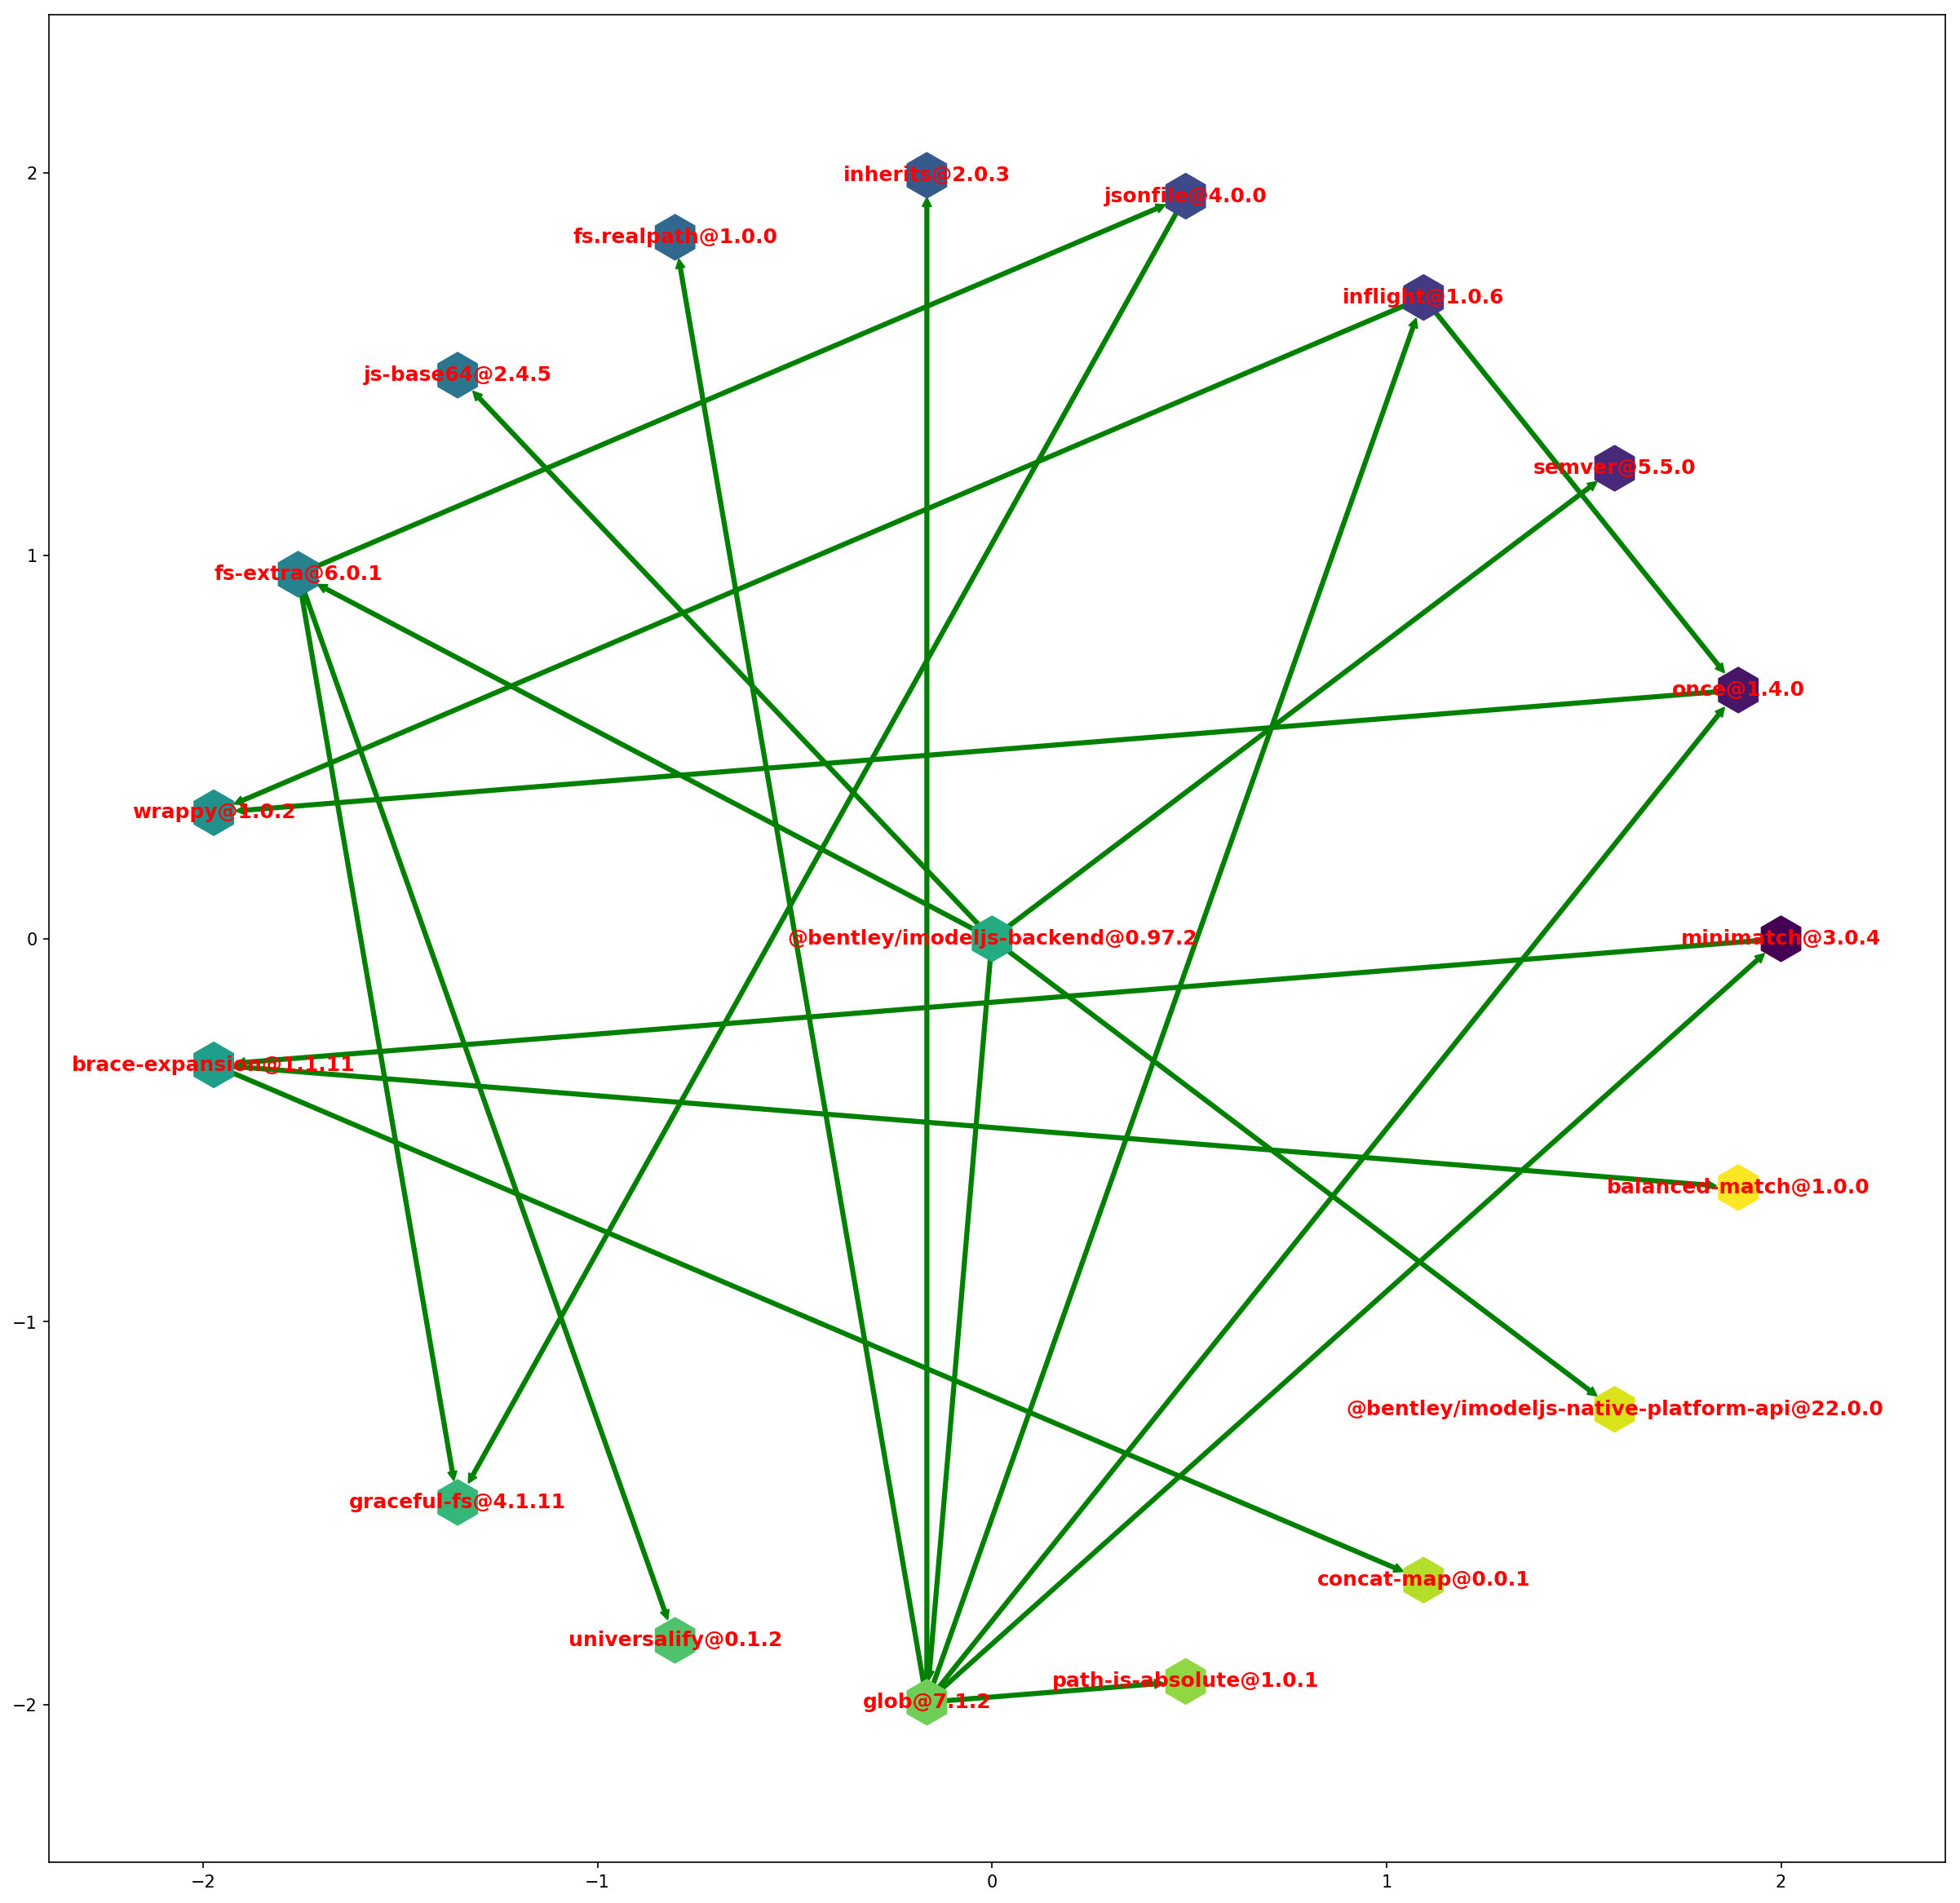

In [68]:


plt.figure(num=None, figsize=(20, 20), dpi=150, facecolor='w', edgecolor='k')
pos = nx.circular_layout(G, scale=2)

# pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)

pos[nodeName] = [0, 0]


nx.draw_networkx(G, pos, with_labels=True, arrowstyle = 'simple', arrowsize = 10, node_size = 700,
               node_color=np.arange(0, len(G.nodes())), node_shape = 'h', alpha = 1,
              edge_color = 'green', font_color ='red', scale = 15, font_weight = 'heavy')
fileName = fileName.replace('/','_')
plt.savefig(fileName)

In [32]:
def ap(l):
    l.append("extra")

In [33]:
l = ["single"]
ap(l)
print l

['single', 'extra']
